In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding


print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


We will now build an LSTM model for the task of next word prediction. In particular, the model will learn to predict the last word in a phrase/sequence and will be trained on phrases of different lengths.

In [10]:
# the data is the lyrics from an Irish song called "Lanigans's Ball"
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# convert to lower case and split the sentences 
corpus = data.lower().split("\n")

print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [11]:
# generate token dictionary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1     # add 1 to include the '0' index for pads

print(f"Total number of words: {total_words}")
print(f"Word index dictionary: {tokenizer.word_index}")

Total number of words: 263
Word index dictionary: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 7

We will now generate the input sequences for our model. To do this, we first generate n-gram sequences for each tokenized sentence, where n ranges from 2 to the length of the sentence.

In [18]:
ngram_sequences = []

for sentence in corpus:
    # tokenized sequence
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1,len(sequence)):
        # get the ngram sequence
        ngram_sequences.append(sequence[:i+1])

In [19]:
ngram_sequences[:13]

[[4, 2],
 [4, 2, 66],
 [4, 2, 66, 8],
 [4, 2, 66, 8, 67],
 [4, 2, 66, 8, 67, 68],
 [4, 2, 66, 8, 67, 68, 69],
 [4, 2, 66, 8, 67, 68, 69, 70],
 [71, 40],
 [71, 40, 20],
 [71, 40, 20, 21],
 [71, 40, 20, 21, 72],
 [71, 40, 20, 21, 72, 3],
 [71, 40, 20, 21, 72, 3, 73]]

Next, we pad the sequences with padding='pre'

In [25]:
padded_sequences = np.array(pad_sequences(ngram_sequences, padding='pre'))
print(padded_sequences[:13])

[[ 0  0  0  0  0  0  0  0  0  4  2]
 [ 0  0  0  0  0  0  0  0  4  2 66]
 [ 0  0  0  0  0  0  0  4  2 66  8]
 [ 0  0  0  0  0  0  4  2 66  8 67]
 [ 0  0  0  0  0  4  2 66  8 67 68]
 [ 0  0  0  0  4  2 66  8 67 68 69]
 [ 0  0  0  4  2 66  8 67 68 69 70]
 [ 0  0  0  0  0  0  0  0  0 71 40]
 [ 0  0  0  0  0  0  0  0 71 40 20]
 [ 0  0  0  0  0  0  0 71 40 20 21]
 [ 0  0  0  0  0  0 71 40 20 21 72]
 [ 0  0  0  0  0 71 40 20 21 72  3]
 [ 0  0  0  0 71 40 20 21 72  3 73]]


Now we can use the last element of each sequence as the label and the preceding portion as the input to train the model.

In [28]:
# inputs
xs = padded_sequences[:,:-1]
sequence_len = xs.shape[1]
# labels
ys = padded_sequences[:,-1]

# convert labels to one-hot vectors of size equal to vocab size
ys_onehot = tf.keras.utils.to_categorical(ys, num_classes=total_words)

Now build and train a bidirectional LSTM model

In [45]:
model = tf.keras.models.Sequential([Embedding(total_words, 16, input_length=sequence_len),
                                    Bidirectional(LSTM(20)),
                                    Dense(total_words, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2023-07-09 14:05:11.415361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-09 14:05:11.417545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-09 14:05:11.418828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 16)            4208      
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               5920      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 263)               10783     
                                                                 
Total params: 20,911
Trainable params: 20,911
Non-trainable params: 0
_________________________________________________________________


In [30]:
# now train the model
model.fit(xs, ys_onehot, epochs=500)

Epoch 1/500


2023-07-09 13:34:15.754833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-09 13:34:15.757890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-09 13:34:15.759856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/15 [==============================] - 10s 134ms/step - loss: 5.5707 - accuracy: 0.0132
Epoch 2/500
15/15 [==============================] - 2s 102ms/step - loss: 5.5586 - accuracy: 0.0464
Epoch 3/500
15/15 [==============================] - 1s 91ms/step - loss: 5.5390 - accuracy: 0.0574
Epoch 4/500
15/15 [==============================] - 1s 67ms/step - loss: 5.4822 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 1s 70ms/step - loss: 5.3043 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 1s 48ms/step - loss: 5.1225 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 32ms/step - loss: 5.0702 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 1s 35ms/step - loss: 5.0438 - accuracy: 0.0530
Epoch 9/500
15/15 [==============================] - 1s 50ms/step - loss: 5.0231 - accuracy: 0.0442
Epoch 10/500
15/15 [==============================] - 1s 48ms/step - loss: 5.0037 - accuracy: 0.0486
Epoch 11

Using the model for text generation. To generate new text given some `seed text`, we can feed the seed text as input to our model and compute the prediction from the softmax, which is a probability distribution for the next word, then we can pick the most probable next word and add that to the seed and repeat the process to generate the next word, until the desired length of generated text is reached. (Note: when the seed length exceeds the model input sequence length, the seed input gets pre truncated by the pad_sequences function). 

In [59]:
def generate_text(seed, num):

    # predict the next num words after the seed text
    for i in range(num):
        # first create padded tokenized sequence of the seed text
        sequence = tokenizer.texts_to_sequences([seed])
        padded_sequence = pad_sequences(sequence, maxlen=sequence_len, padding='pre')

        # predict probabilities for next word
        probs = model.predict(padded_sequence, verbose=0)
        max_prob_index = np.argmax(probs, axis=-1)[0]

        # ignore 0 index which is padding
        if(max_prob_index != 0):
            # get the next word and add it to the seed
            seed += " " + tokenizer.index_word[max_prob_index]

    return seed       

In [60]:
sample_seed = "She went to Dublin"
gen_len = 100
generated_text = generate_text(sample_seed, gen_len)
print(generated_text)

She went to Dublin away away away away away kerrigan satisfaction town lads town town three three poor three poor nonsense bees grand smashed smashed make bacon bacon morgan if potatoes happened swore swore merry merry nolans him nolans potatoes pound nolans potatoes tore tore right groups pound pound listen tore listen made gathered right right brooks meelia meelia brooks til both both soon merry soon as smashed ball tore as room tore swore swore swore potatoes eyes potatoes tore potatoes nolans potatoes pound nolans potatoes pound tore glisten lashings songs nonsense nonsense nonsense nonsense oh mad bees ach bees little danced table them


Note that choosing the most probable next word results in bad generated texts since there are many repeated words when the length of the generated text becomes long. One was to avoid this is to randomly sample from say the top 5 most probable words.

In [79]:
def generate_text_2(seed, num):

    # predict the next num words after the seed text
    for i in range(num):
        # first create padded tokenized sequence of the seed text
        sequence = tokenizer.texts_to_sequences([seed])
        padded_sequence = pad_sequences(sequence, maxlen=sequence_len, padding='pre') 
        # predict probabilities for next word
        probs = model.predict(padded_sequence, verbose=0)[0]

        # randomly pick from top 5
        pick = np.random.choice([1,2,3,4,5]) 
        next_word_index = np.argsort(probs)[-pick]

        # ignore 0 index which is padding
        if(next_word_index != 0):
            # get the next word and add it to the seed
            seed += " " + tokenizer.index_word[next_word_index]

    return seed     

In [80]:
sample_seed = "She went to Dublin"
gen_len = 100
generated_text = generate_text_2(sample_seed, gen_len)
print(generated_text)

She went to Dublin lick lashings their soon brooks nelly him ten ten oh room bees all nice potatoes satisfaction nolans small by happened eyes potatoes potatoes reel pound nolans tore eyes singing potatoes potatoes tore groups pound nolans him catchers pound him gave bellows tore some glisten make hall glisten sure lashings murther hall runctions wink think by runctions ach runctions ach runctions cheeks potatoes nonsense eyes eyes together tore bees by time by called strangled groups satisfaction town new julia were murther doing leg then an then under listen brothers died died died as taras invitation bees strangled squeezed hearty girls punch


Now, lets train a more powerful model on a largus corpus of text

In [82]:
# load irish songs from file
data = open("./Laurences_generated_poetry.txt").read()

# lowercase and split sentences
corpus = data.lower().split("\n")

print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [83]:
# generate tokenized inputs and labels, just like before
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1     # add 1 to include the '0' index for pads

print(f"Total number of words: {total_words}")
print(f"Word index dictionary: {tokenizer.word_index}")

ngram_sequences = []
for sentence in corpus:
    # tokenized sequence
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1,len(sequence)):
        # get the ngram sequence
        ngram_sequences.append(sequence[:i+1])

padded_sequences = np.array(pad_sequences(ngram_sequences, padding='pre'))

# inputs
xs = padded_sequences[:,:-1]
sequence_len = xs.shape[1]
# labels
ys = padded_sequences[:,-1]
# convert labels to one-hot vectors of size equal to vocab size
ys_onehot = tf.keras.utils.to_categorical(ys, num_classes=total_words)

Total number of words: 2690
Word index dictionary: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85

In [96]:
# model hyperparameters
embedding_dims = 128
lstm_units = 150
learning_rate = 0.01

# build and compile model
model = tf.keras.models.Sequential([Embedding(total_words, embedding_dims, input_length=sequence_len),
                                    Bidirectional(LSTM(lstm_units)),
                                    Dense(total_words, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 128)           344320    
                                                                 
 bidirectional_4 (Bidirectio  (None, 300)              334800    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 2690)              809690    
                                                                 
Total params: 1,488,810
Trainable params: 1,488,810
Non-trainable params: 0
_________________________________________________________________


2023-07-09 15:06:25.679224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-09 15:06:25.680708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-09 15:06:25.681662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [97]:
NUM_EPOCHS = 100

# train the model
history = model.fit(xs, ys_onehot, epochs=NUM_EPOCHS)

Epoch 1/100


2023-07-09 15:06:26.578726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-09 15:06:26.579952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-09 15:06:26.580806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

377/377 [==============================] - 12s 27ms/step - loss: 6.6405 - accuracy: 0.0768
Epoch 2/100
377/377 [==============================] - 5s 13ms/step - loss: 5.7850 - accuracy: 0.1141
Epoch 3/100
377/377 [==============================] - 5s 12ms/step - loss: 4.9237 - accuracy: 0.1656
Epoch 4/100
377/377 [==============================] - 4s 12ms/step - loss: 4.0305 - accuracy: 0.2333
Epoch 5/100
377/377 [==============================] - 4s 12ms/step - loss: 3.2233 - accuracy: 0.3234
Epoch 6/100
377/377 [==============================] - 5s 12ms/step - loss: 2.5712 - accuracy: 0.4244
Epoch 7/100
377/377 [==============================] - 4s 12ms/step - loss: 2.0891 - accuracy: 0.5133
Epoch 8/100
377/377 [==============================] - 4s 12ms/step - loss: 1.7374 - accuracy: 0.5818
Epoch 9/100
377/377 [==============================] - 4s 11ms/step - loss: 1.5093 - accuracy: 0.6326
Epoch 10/100
377/377 [==============================] - 4s 11ms/step - loss: 1.3350 - accurac

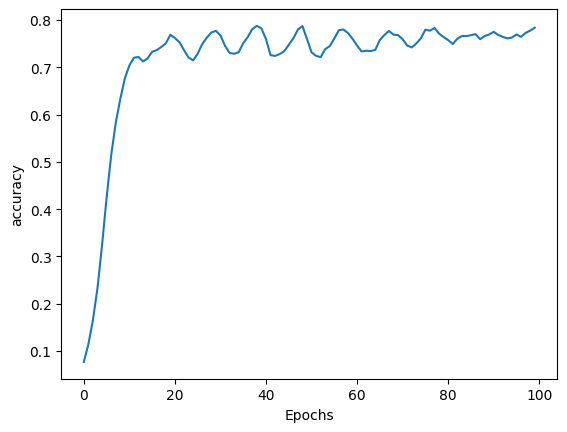

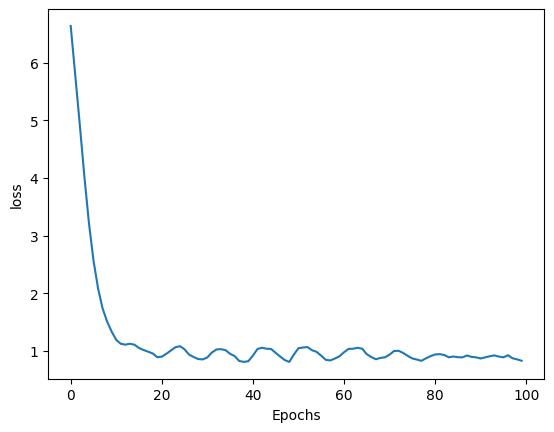

In [98]:
import matplotlib.pyplot as plt 

# lets now plot some learning curves
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    #plt.plot(history.history["val_"+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    #plt.legend([metric, "val_"+metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


Now let's used this more powerful model to generate some text

In [99]:
sample_seed = "She went to Dublin"
gen_len = 100
generated_text = generate_text_2(sample_seed, gen_len)

2023-07-09 15:16:45.410945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-09 15:16:45.412218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-09 15:16:45.413009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [100]:
print(generated_text)

She went to Dublin you so tender darling in her there all lanigans o opened the wild of that neat girls an saxon like sold whisky gone away eyes and gone alas it alone the pots that won in sunday hand on its the sound road with wild pass on the grass too ra sailor got still gone love easy one horse that the best day where hes ever after it put thy right leg than way at da bride a day youve sailor yet road to dublin union there and all the morning land love till that made gallant well ive see me


Note that the text by this model now contains much fewer repeated words and the grammar and syntax seems to have improved significantly